<h1>Perceptron for linearly seperable data -- Setosa and Versicolor</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#loading the data from code given at Pg. 29 of the book.
iris_df=pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/iris/iris.data',header=None)

In [3]:
#Taking the code from textbook as a base code from pg. 25-26 in the textbook.
#Implementing the perceptron model from scratch using classes as a concept in python
class Perceptron(object):
#We initialize the values of learning rate, no. of iterations and random state(to be used in random weight calculation).
    def __init__(self, eta=0.01, n_iter=50, random_state=1):  
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
#We generate a random array using the random_state variable and then we calculate random weights for each iteration.
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
#We calulate the change in weights using the update function (using the formula given in the course slides.)
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
#W then calculate the input that has to be given to the phi function
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
#With the input if it is greater or equal to 0 we return 1 otherwise -1.
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [4]:
#Code to plot the graph for seperation of clusters. Using this we can plot a decision surface 
#that decides which nodes belong to which cluster
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 # Setup marker generator and color map
    markers = ('o', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 # Setting up the min and max, then generating a grid according to them. 
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
 # Predicting the surfce using the classifier and reshaping the grid according to it.
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
 # Plotting the class samples on the grid
    plt.contourf(xx1, xx2, Z, alpha=0.05, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

<h1>Perceptron for two linearly separable features (Sepal Lengeth and Petal Length)</h1>

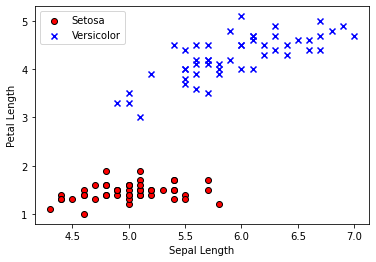

In [5]:
#Making a plot to show that the features selected are linearly separable. (Reference Pg.)
#Putting Labels in Y and Features(in this case just 2) in X for Setosa and Versicolor and plotting a scatterplot.
y_2f = iris_df.iloc[0:100, 4].values
y_2f = np.where(y_2f == 'Iris-setosa', -1, 1) ## If y is setosa allot -1 else allot 1 -- target output
X_2f = iris_df.iloc[0:100, [0, 2]].values
plt.scatter(X_2f[:50, 0], X_2f[:50, 1],color='red', marker='o', label='Setosa',edgecolor='black')
plt.scatter(X_2f[50:100, 0], X_2f[50:100, 1],color='blue', marker='x', label='Versicolor',edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()
#The graph below shows that the values of the features are linearly separable.

In [6]:
#taking 15% of the data to be the test data and 85% for training 
X_2ftrain, X_2ftest, y_2ftrain, y_2ftest = train_test_split(X_2f, y_2f, test_size=0.15,random_state=0)

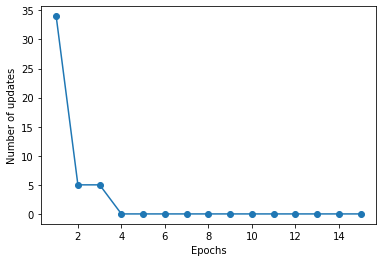

In [7]:
# Executing the perceptron model using 0.001 as the learning rate and passing the model through the data 10 times
ppn_2f = Perceptron(eta=0.0001, n_iter=15, random_state=1)
ppn_2f.fit(X_2ftrain, y_2ftrain)
plt.plot(range(1, len(ppn_2f.errors_) + 1),ppn_2f.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
#The graph below shows that after the 4th pass of the data the perceptron converged and did'nt misclassify after.

In [8]:
print("Accuracy: %f" % accuracy_score(ppn_2f.predict(X_2ftest), y_2ftest))
#The accuracy comes out to be 1 for linearly separable --Since they are easily separable 

Accuracy: 1.000000


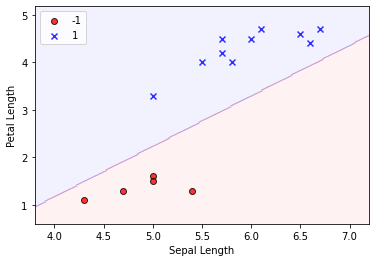

In [9]:
#Plotting the decision regions for 2 features
plot_decision_regions(X_2ftest, y_2ftest, classifier=ppn_2f)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

<h1>Perceptron for three linearly separable features (Sepal Lengeth, Sepal Width and Petal Length)</h1>

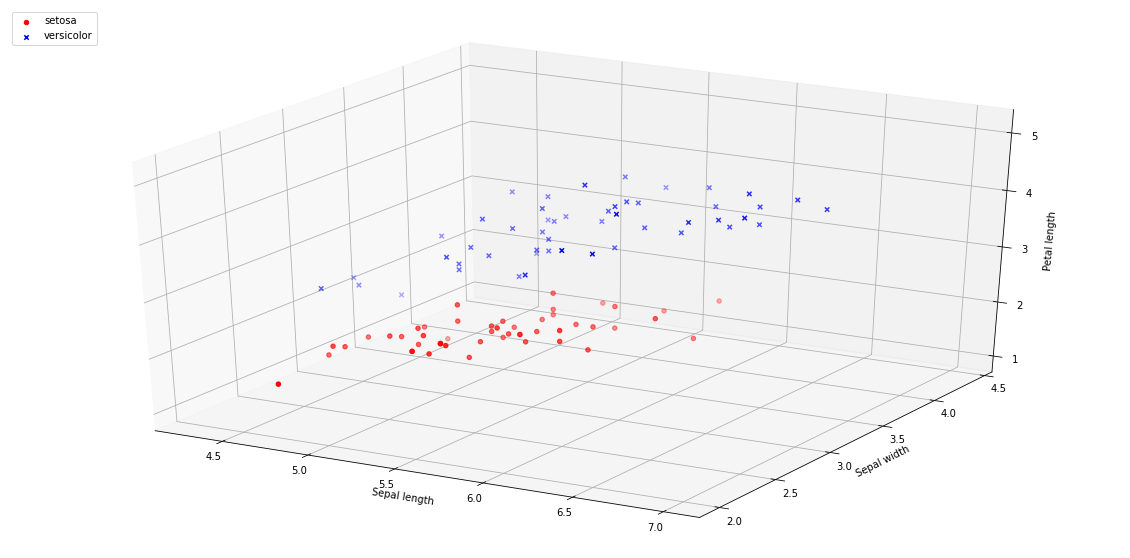

In [10]:
#Putting Labels in Y and Features(in this case just 3) in X for Setosa and Versicolor values and plotting a scatterplot.
y_3f = iris_df.iloc[0:100, 4].values
y_3f = np.where(y_3f == 'Iris-setosa', -1, 1)
X_3f = iris_df.iloc[0:100, 0:3].values
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection='3d')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
# Plotting the samples using a 3D scatterplot
ax.scatter(X_3f[:50, 0], X_3f[:50, 1], X_3f[:50, 2], color='red', marker='o', s=20, label="setosa")
ax.scatter(X_3f[50:100, 0], X_3f[50:100, 1], X_3f[50:100, 2], color='blue', marker='x', s=20, label="versicolor")
plt.legend(loc='upper left')
plt.show()

In [11]:
#taking 15% of the data to be the test data and 85% for training 
X_3ftrain, X_3ftest, y_3ftrain, y_3ftest = train_test_split(X_3f, y_3f, test_size=0.15,random_state=0)

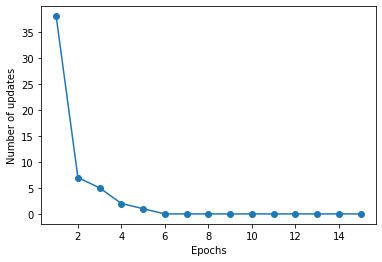

In [12]:
#Running the features through the models using the Perceptron class
ppn_3f = Perceptron(eta=0.0001, n_iter=15, random_state = 1)
ppn_3f.fit(X_3ftrain, y_3ftrain)
plt.plot(range(1, len(ppn_3f.errors_) + 1),ppn_3f.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
#The plot shows that the perceptron converges after 6 passes of data through the model.

In [13]:
print("Accuracy: %f" % accuracy_score(ppn_3f.predict(X_3ftest), y_3ftest))
#The accuracy here is also 1 because they were linearly separable.

Accuracy: 1.000000


<h1>Perceptron for linearly separable 4 features</h1>

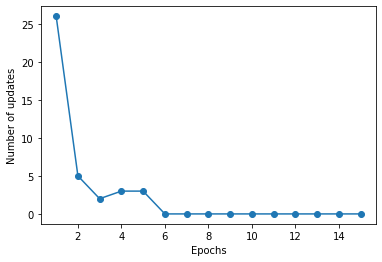

In [14]:
#Doing the above steps for all four features.

y_4f = iris_df.iloc[0:100, 4].values
y_4f = np.where(y_4f == 'Iris-setosa', -1, 1)
X_4f = iris_df.iloc[0:100, 0:4].values

X_4ftrain, X_4ftest, y_4ftrain, y_4ftest = train_test_split(X_4f, y_4f, test_size=0.15,random_state=0)

ppn_4f = Perceptron(eta=0.0001, n_iter=15, random_state = 1)
ppn_4f.fit(X_4ftrain, y_4ftrain)
plt.plot(range(1, len(ppn_4f.errors_) + 1),ppn_4f.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
#The model converges at 6 epochs

In [15]:
print("Accuracy: %f" % accuracy_score(ppn_4f.predict(X_4ftest), y_4ftest))
#The accuracy is 100% here as well as the features are linearly separable.

Accuracy: 1.000000


<h1>Perceptron for non linearly separable data -- Versicolor and Virginica</h1>

<h1>Perceptron for two non linearly separable features (Sepal Lengeth and Petal Length)</h1>

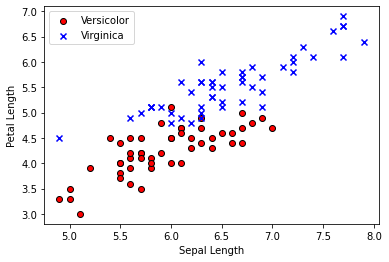

In [16]:
#Alloting the data to variables and plotting the scatterplot
y_2nl = iris_df.iloc[50:150, 4].values
y_2nl = np.where(y_2nl == 'Iris-versicolor', -1, 1)
X_2nl = iris_df.iloc[50:150, [0, 2]].values
plt.scatter(X_2nl[0:50, 0], X_2nl[0:50, 1],color='red', marker='o', label='Versicolor',edgecolor='black')
plt.scatter(X_2nl[50:100, 0], X_2nl[50:100, 1],color='blue', marker='x', label='Virginica',edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc='upper left')
plt.show()

In [17]:
#Splitting the data into training and testing
X_2nltrain, X_2nltest, y_2nltrain, y_2nltest = train_test_split(X_2nl, y_2nl, test_size=0.15,random_state=0)

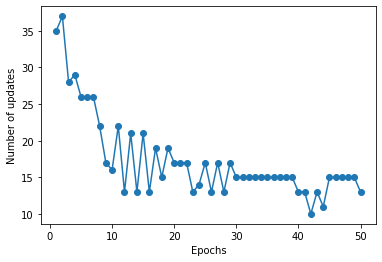

In [18]:
#Fitting the model
ppn_2nl = Perceptron(eta=0.0002, n_iter=50, random_state=1)
ppn_2nl.fit(X_2nltrain, y_2nltrain)
plt.plot(range(1, len(ppn_2nl.errors_) + 1),ppn_2nl.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
# The plot below shows that even after 50 epochs the graph has not converged 

In [19]:
print("Accuracy: %f" % accuracy_score(ppn_2nl.predict(X_2nltest), y_2nltest))
#The accuracy is 0.86 as the data is not separable and some misclassification might happen.

Accuracy: 0.866667


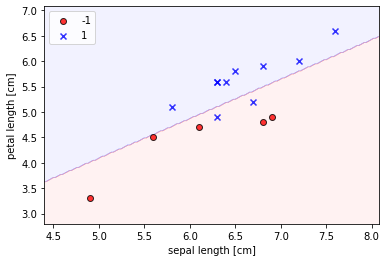

In [20]:
plot_decision_regions(X_2nltest, y_2nltest, classifier=ppn_2nl)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
#The plot below shows the classification. Some of the nodes are in the class they dont belong in.

<h1>Perceptron for three non linearly separable features (Sepal Lengeth, Sepal Width and Petal Length)</h1>

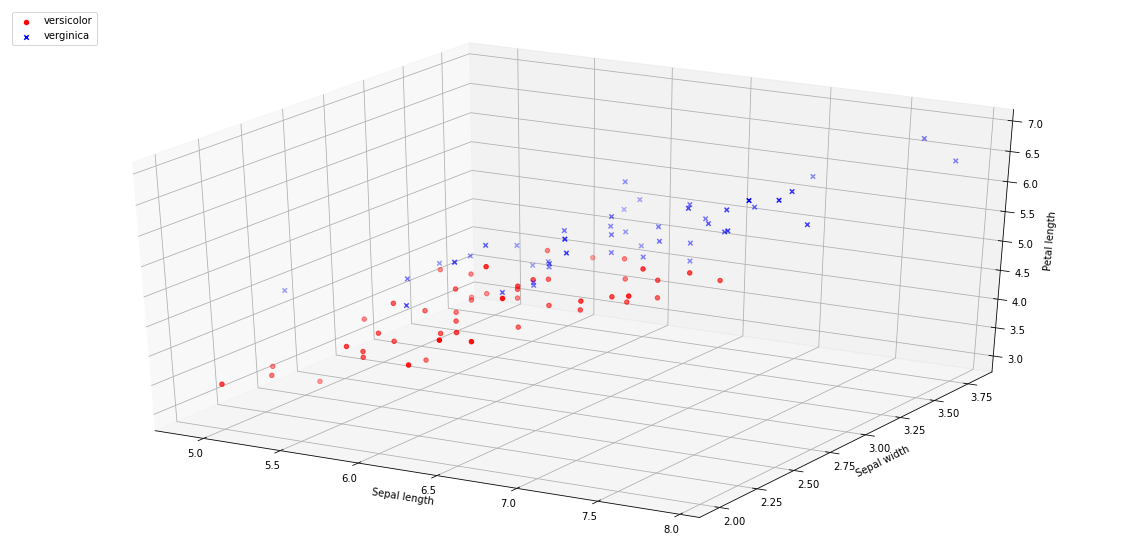

In [21]:
#Alloting the data in variables and plotting the graph
y_3nl = iris_df.iloc[50:150, 4].values
y_3nl = np.where(y_3nl == 'Iris-versicolor', -1, 1)
X_3nl = iris_df.iloc[50:150, 0:3].values
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection='3d')
ax.set_xlabel("Sepal length")
ax.set_ylabel("Sepal width")
ax.set_zlabel("Petal length")
ax.scatter(X_3nl[:50, 0], X_3nl[:50, 1], X_3nl[:50, 2], color='red', marker='o', s=20, label="versicolor")
ax.scatter(X_3nl[50:100, 0], X_3nl[50:100, 1], X_3nl[50:100, 2], color='blue', marker='x', s=20, label="verginica")
plt.legend(loc='upper left')
plt.show()
#The graph shows intersections in data

In [22]:
#Splitting the data into 85% training and 15% testing
X_3nltrain, X_3nltest, y_3nltrain, y_3nltest = train_test_split(X_3nl, y_3nl, test_size=0.15,random_state=0)

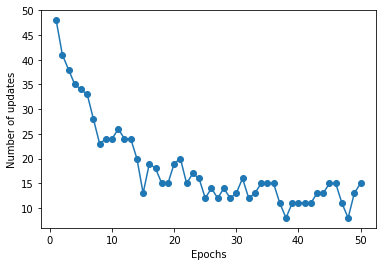

In [23]:
#Fitting the model 
ppn_3nl = Perceptron(eta=0.0001, n_iter=50, random_state = 1)
ppn_3nl.fit(X_3nltrain, y_3nltrain)
plt.plot(range(1, len(ppn_3nl.errors_) + 1),ppn_3nl.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [24]:
#The accuracy is 0.86
print("Accuracy: %f" % accuracy_score(ppn_3nl.predict(X_3nltest), y_3nltest))

Accuracy: 0.866667


<h1>Perceptron for non linearly separable 4 features</h1>

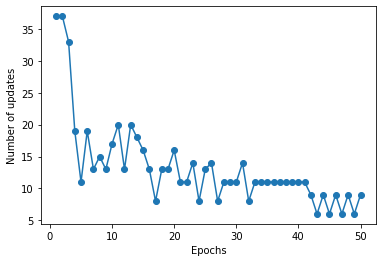

In [25]:
#Doing the same for 4 features
y_4nl = iris_df.iloc[50:150, 4].values
y_4nl = np.where(y_4nl == 'Iris-versicolor', -1, 1)
X_4nl = iris_df.iloc[50:150, 0:4].values

X_4nltrain, X_4nltest, y_4nltrain, y_4nltest = train_test_split(X_4nl, y_4nl, test_size=0.15,random_state=0)

ppn_4nl = Perceptron(eta=0.0002, n_iter=50, random_state = 1)
ppn_4nl.fit(X_4nltrain, y_4nltrain)
plt.plot(range(1, len(ppn_4nl.errors_) + 1),ppn_4nl.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [26]:
#Accuracy is 1.00 for this model.
print("Accuracy: %f" % accuracy_score(ppn_4nl.predict(X_4nltest), y_4nltest))

Accuracy: 1.000000


<h1>Adaline for linearly seperable data -- Setosa and Versicolor</h1>

In [27]:
#Refernce of code from pg 38.
#We create Adaline class and initialize the variables
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    #Fitting the model by calculating the cost function
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    #Calculating the net input to give to phi
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    #Calculating the activation function (phi) that has to be passed to Q
    def activation(self, X):
        return X
    #predicting model as a final output using activation function outputs as inputs
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<h1>Adaline for two linearly separable features (Sepal Lengeth and Petal Length)</h1>

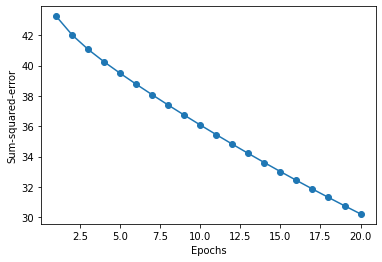

In [28]:
#Using the same partitioned data above to call adaline model on
ada_2f = AdalineGD(eta=0.0001, n_iter=20, random_state=1)
ada_2f.fit(X_2ftrain, y_2ftrain)
plt.plot(range(1, len(ada_2f.cost_) + 1), ada_2f.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
#The plot shows how the error minimizes untill it reaches a global minimum.

In [29]:
print('Accuracy: %.2f' % accuracy_score(y_2ftest, ada_2f.predict(X_2ftest)))
#Accuracy depends on learning rate in this case it is 1

Accuracy: 1.00


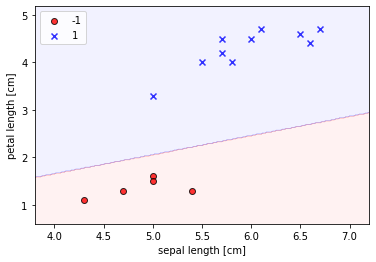

In [30]:
#Plotting the decision surface for the model
plot_decision_regions(X_2ftest, y_2ftest, classifier=ada_2f)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<h1>Adaline for three linearly separable features (Sepal Lengeth, Sepal Width and Petal Length)</h1>

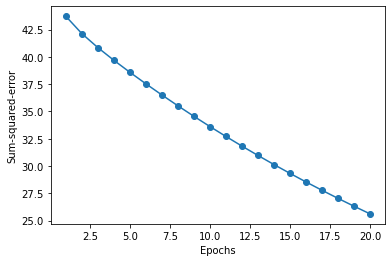

In [31]:
#Plotting the moodel after fitting
ada_3f = AdalineGD(eta=0.0001, n_iter=20, random_state=1)
ada_3f.fit(X_3ftrain, y_3ftrain)
plt.plot(range(1, len(ada_3f.cost_) + 1),ada_3f.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [32]:
#The accuracy is 1
print('Accuracy: %.2f' % accuracy_score(y_3ftest, ada_3f.predict(X_3ftest)))

Accuracy: 1.00


<h1>Adaline for linearly separable 4 features</h1>

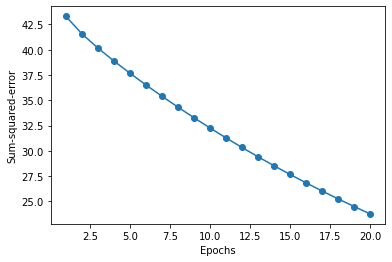

In [33]:
#Doing the same for 4 features
ada_4f = AdalineGD(eta=0.0001, n_iter=20, random_state=1)
ada_4f.fit(X_4ftrain, y_4ftrain)
plt.plot(range(1, len(ada_4f.cost_) + 1),ada_4f.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [34]:
#The accuracy is 1 here as well as the classes are linearly separable.
print('Accuracy: %.2f' % accuracy_score(y_4ftest, ada_4f.predict(X_4ftest)))

Accuracy: 1.00


<h1>Adaline for non linearly separable data -- Versicolor and Virginica</h1>

<h1>Adaline for two non linearly separable features (Sepal Lengeth and Petal Length)</h1>

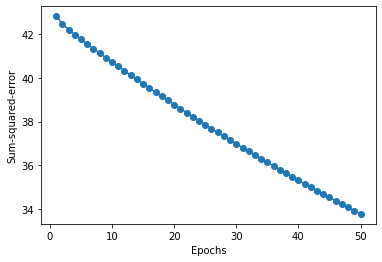

In [35]:
#Fitting the model
ada_2nl = AdalineGD(eta=0.0003, n_iter=50, random_state=1)
ada_2nl.fit(X_2nltrain, y_2nltrain)
plt.plot(range(1, len(ada_2nl.cost_) + 1),ada_2nl.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [36]:
#Accuracy max for learning rate = 0.0003-0.00035.
print("Accuracy: %f" % accuracy_score(ada_2nl.predict(X_2nltest), y_2nltest))

Accuracy: 0.933333


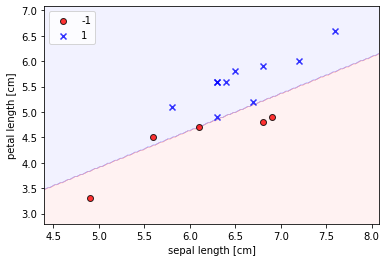

In [37]:
#Plotting the decision surface
plot_decision_regions(X_2nltest, y_2nltest, classifier=ada_2nl)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<h1>Adaline for three non linearly separable features (Sepal Lengeth, Sepal Width and Petal Length)</h1>

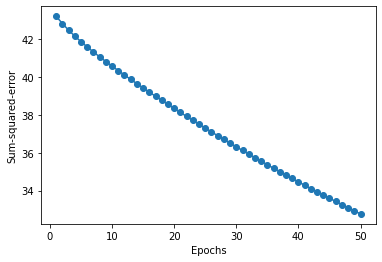

In [38]:
#Fitting and plotting the model with respect to the error
ada_3nl = AdalineGD(eta=0.0003, n_iter=50, random_state=1)
ada_3nl.fit(X_3nltrain, y_3nltrain)
plt.plot(range(1, len(ada_3nl.cost_) + 1),ada_3nl.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [39]:
#printing the accuracy
print("Accuracy: %f" % accuracy_score(ada_3nl.predict(X_3nltest), y_3nltest))

Accuracy: 1.000000


<h1>Adaline for non linearly separable 4 features</h1>

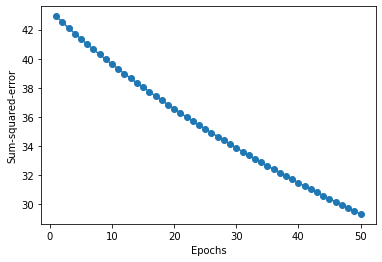

In [40]:
#Fitting the model and plotting
ada_4nl = AdalineGD(eta=0.0003, n_iter=50, random_state=1)
ada_4nl.fit(X_4nltrain, y_4nltrain)
plt.plot(range(1, len(ada_4nl.cost_) + 1),ada_4nl.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

In [41]:
#Priting the accuracy
print("Accuracy: %f" % accuracy_score(ada_4nl.predict(X_4nltest), y_4nltest))

Accuracy: 1.000000


In [42]:
#Summary of results
results = {'Algorithm': ['Pereptron','Adaline'],
           'Accuracy 2f L.S.': ['1.00','1.00'],
           'Accuracy 3f L.S.': ['1.00','1.00'],
           'Accuracy 4f L.S.': ['1.00','1.00'],
           'Accuracy 2f N.L.S.': ['0.86','0.93'],
           'Accuracy 3f N.L.S.': ['0.86','1.00'],
           'Accuracy 4f N.L.S.': ['0.93','1.00'],
        }

df = pd.DataFrame(results, columns = ['Algorithm', 'Accuracy 2f L.S.', 'Accuracy 3f L.S.', 'Accuracy 4f L.S.', 'Accuracy 2f N.L.S.', 'Accuracy 3f N.L.S.','Accuracy 4f N.L.S.'])
df

,Algorithm,Accuracy 2f L.S.,Accuracy 3f L.S.,Accuracy 4f L.S.,Accuracy 2f N.L.S.,Accuracy 3f N.L.S.,Accuracy 4f N.L.S.
0,Pereptron,1.00,1.00,1.00,0.86,0.86,0.93
1,Adaline,1.00,1.00,1.00,0.93,1.00,1.00


<h1> Key Obervations:</h1>
<h3>1. Adaline performs better than perceptron for non linearly separable data. This checks out with the theoretical knowledge.</h3>
<h3>2. For non linearly separable data, adding more features gives a better accuracy as proved from the results above.</h3>
<h3>3. The learning rate affects a lot in adaline but not as much in perceptron. According to my testing the accuracy was similar or same for 0.01 and 0.001 for perceptron but for adaline a factor of 0.0001 also made a difference. Other things that also had effect on accuracy were: The number of data times data passed through the models (epochs) and even the ratio of testing and training data.</h3>

